## histograms

 it allows visualize these pixel intesity distribution



In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

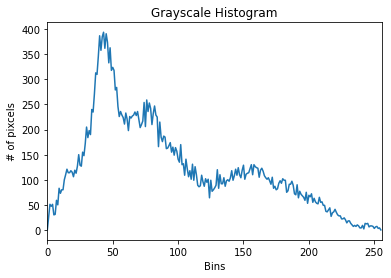

-1

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('./Curso-Opencv-full/images/cats.jpg')

cv.imshow('cast', img)

blank = np.zeros(img.shape[:2] , dtype='uint8')


gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)


circle = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1 )



mask = cv.bitwise_and(gray, gray, mask=circle)


cv.imshow('Mask', mask)
#Grayscale histogram

# gray_hist = cv.calcHist([gray], [0], None, [256], [0, 256])
gray_hist = cv.calcHist([gray], [0], mask, [256], [0, 256])

plt.figure()


plt.title('Grayscale Histogram')

plt.xlabel('Bins')

plt.ylabel('# of pixcels')

plt.plot(gray_hist)

plt.xlim([0, 256])

plt.show()

cv.waitKey(0)


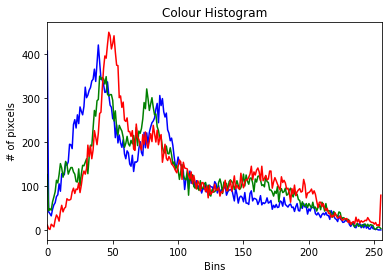

-1

In [11]:
mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1 )



masked = cv.bitwise_and(img, img, mask=mask)


cv.imshow('Mask', masked)
plt.figure()


plt.title('Colour Histogram')

plt.xlabel('Bins')

plt.ylabel('# of pixcels')
# Colour Histogram
colors = ('b', 'g', 'r')

for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.show()
cv.waitKey(0)

 ## Thresholding
 
 thresholding is a binarysation of an image, in general we want to take an image and convert it to a binary image, that is an image where pixels are either zero or black, or 255, or white. Now,  very simple example of thresholfing would be to
 take an image and take some particular value that we're going to call to thresholding and compare each pixel of the image to this threshold of value, if that pixel intensity is less than the threshold value, we set that pixel intesity to zero and  if it is above thi threshold value, we set to 255, or white, we can create a binary image just from a regular standalone image
 
 two different ways
 
 * simple thresholding
 
 * adaptive thresholding

In [13]:
img = cv.imread('./Curso-Opencv-full/images/cat.jpg')

cv.imshow('cats', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('GRay', gray)
# Simple Thresholding
# thresh es the thresholder image, binarized image, and threshold, the same value that you passes 150
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)

cv.imshow('Simple Thresholder', thresh)

# inverse threshold
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)

cv.imshow('Simple Thresholder Inverse', thresh_inv)
cv.waitKey(0)

-1

In [17]:
# Adaptive Thresholding
# dejames que la computadora encuentre el optimo threshold

# and using that value that refines in binary over the image

# c value es essentially an integer that is subtracted from the mean, allowing us to essentially fine tune our threshold
#/----------------------------------------------------------------> _MEAN_C podemos Usar GAUSSIAN
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 3)
# block size es de kernel size with open cv needs to use to essentially compute mean to find the optimal threshold value
cv.imshow('Adaptive Thresholding', adaptive_thresh)

# difference tha Gaussian applied was essentially add a weight to each pixel value, and compute the mean across those pixels,
# we were able to get a better image than when we use the mean

# in simple thresholding, we have to manually specify a threshold value
# in adaptive thresholding, open CV does that for us using a specific

cv.waitKey(0)

# We've defined a kernel size or window that is drawn of this image

# open cv does is it essentially computes a mean over those neighborhood and finde the optimeal threshold value for that specific part.

# And then it slides over to the right, and it slides, it does same thing

# computes the optimal threshold value on the basis of the mean

# podemos hacerlo con la gaussian (add a weight to each pixel value, and cmputed the mean across those pixels)


-1

In [19]:
import numpy as np
# Laplacian

img = cv.imread('./Curso-Opencv-full/images/cat.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

# Laplacian edges
# D depth or data depth 
lap = cv.Laplacian(gray, cv.CV_64F)

lap = np.uint8(np.absolute(lap))

cv.imshow('Laplacian', lap)
cv.waitKey(0)

# The laplacian method computes  the gradients of this image the grayscale image.
# Generally when you transition from black to white(positive slope) and white to black(negative slope), that's considered a positive and negative slope

# imges itself cannot have negative pixel values. So what we do is we essentially compute the absolute value of that image
# So all the pixel values of the image are converted to the absolute values
# And then we convert that to  a uint8 to a image specific datatype. 

# So that's basically the crux

-1

In [22]:
# Sobel gradient magnitude representation

# Sobel computes the gradients in two directions, the x and y


sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0) # x direction
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1) # y direction

cv.imshow('Sobel X', sobelx)
cv.imshow('Sobel Y', sobely)

combined_sobel = cv.bitwise_or(sobelx, sobely)

cv.imshow('Combined Sobel', combined_sobel)


canny = cv.Canny(gray, 150, 175)
cv.imshow('Canny', canny)





cv.waitKey(0)

#canny is a multi stage process, and of its stags using sobel 
# you see that the canny edge detector is a more cleaner version  of the edges that can be found in the images

# in more advance cases sobel use a lot

-1